Now we want to write the Kitaev Honeycomb Lattice Hamiltonian using Fermionic notation

In [414]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import importlib
importlib.reload(site)

[[np.int64(0), np.int64(11)], [np.int64(2), np.int64(13)], [np.int64(4), np.int64(15)], [np.int64(6), np.int64(17)], [np.int64(10), np.int64(22)], [np.int64(12), np.int64(24)], [np.int64(14), np.int64(26)], [np.int64(16), np.int64(28)], [np.int64(19), np.int64(31)], [np.int64(21), np.int64(33)], [np.int64(23), np.int64(35)], [np.int64(25), np.int64(37)], [np.int64(30), np.int64(41)], [np.int64(32), np.int64(43)], [np.int64(34), np.int64(45)], [np.int64(36), np.int64(47)]]


<module 'Class_site' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/Class_site.py'>

In [415]:
Npx = 3 # Number of plaquette in each dimension
Npy = 4
model = site.SitesOBC(Npx, Npy)

In [416]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print(model.Nxsites_1)
print(model.Nxsites_2)
print(model.Nyrows)
print(model.partition)

Number of sites: 38
array of ordered sites:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
7
8
5
['A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'A'
 'B' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B'
 'A' 'B']


In [417]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]
 [6 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [6 1]
 [7 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [6 2]
 [7 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]
 [6 3]
 [7 3]
 [0 4]
 [1 4]
 [2 4]
 [3 4]
 [4 4]
 [5 4]
 [6 4]]


In [418]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
(5, 0)


In [419]:
9 % 2

1

In [420]:
xx_bond, yy_bond, zz_bond = model.get_bonds()
diagonal_bonds = model.get_diagonalbonds()

first row
id 0 idx 0 idy 0
first row
id 1 idx 1 idy 0
first row
id 2 idx 2 idy 0
first row
id 3 idx 3 idy 0
first row
id 4 idx 4 idy 0
first row
id 5 idx 5 idy 0
first row
id 6 idx 6 idy 0
odd row
id 7 idx 0 idy 1
odd row
id 8 idx 1 idy 1
odd row
id 9 idx 2 idy 1
odd row
id 10 idx 3 idy 1
odd row
id 11 idx 4 idy 1
odd row
id 12 idx 5 idy 1
odd row
id 13 idx 6 idy 1
odd row
id 14 idx 7 idy 1
even row
id 15 idx 0 idy 2
even row
id 16 idx 1 idy 2
even row
id 17 idx 2 idy 2
even row
id 18 idx 3 idy 2
even row
id 19 idx 4 idy 2
even row
id 20 idx 5 idy 2
even row
id 21 idx 6 idy 2
even row
id 22 idx 7 idy 2
odd row
id 23 idx 0 idy 3
odd row
id 24 idx 1 idy 3
odd row
id 25 idx 2 idy 3
odd row
id 26 idx 3 idy 3
odd row
id 27 idx 4 idy 3
odd row
id 28 idx 5 idy 3
odd row
id 29 idx 6 idy 3
odd row
id 30 idx 7 idy 3
last row
id 31 idx 0 idy 4
last row
id 32 idx 1 idy 4
last row
id 33 idx 2 idy 4
last row
id 34 idx 3 idy 4
last row
id 35 idx 4 idy 4
last row
id 36 idx 5 idy 4


In [421]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))
print("diagonal_bonds: ", np.array(diagonal_bonds))


xx_bond:  [[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 8  9]
 [10 11]
 [12 13]
 [15 16]
 [17 18]
 [19 20]
 [21 22]
 [24 25]
 [26 27]
 [28 29]
 [32 33]
 [34 35]
 [36 37]]
yy_bond:  [[ 2  1]
 [ 4  3]
 [ 6  5]
 [ 8  7]
 [10  9]
 [12 11]
 [14 13]
 [17 16]
 [19 18]
 [21 20]
 [24 23]
 [26 25]
 [28 27]
 [30 29]
 [32 31]
 [34 33]
 [36 35]]
zz_bond:  [[ 0  7]
 [ 2  9]
 [ 4 11]
 [ 6 13]
 [ 8 16]
 [10 18]
 [12 20]
 [14 22]
 [15 23]
 [17 25]
 [19 27]
 [21 29]
 [24 31]
 [26 33]
 [28 35]
 [30 37]]
diagonal_bonds:  [[ 0  9]
 [ 2 11]
 [ 4 13]
 [ 8 18]
 [10 20]
 [12 22]
 [15 25]
 [17 27]
 [19 29]
 [24 33]
 [26 35]
 [28 37]]


In [422]:
lllist = [3,4,5]
for i, id in enumerate(lllist):
    print(i, id)

0 3
1 4
2 5


id 0 idx 0 idy 0
x 0.0 y -0.0
id 1 idx 1 idy 0
x 0.8660254037844386 y 0.5
id 2 idx 2 idy 0
x 1.7320508075688772 y -0.0
id 3 idx 3 idy 0
x 2.598076211353316 y 0.5
id 4 idx 4 idy 0
x 3.4641016151377544 y -0.0
id 5 idx 5 idy 0
x 4.330127018922193 y 0.5
id 6 idx 6 idy 0
x 5.196152422706632 y -0.0
id 7 idx 7 idy 0
x 6.06217782649107 y 0.5
id 8 idx 8 idy 0
x 6.928203230275509 y -0.0
id 9 idx 9 idy 0
x 7.794228634059947 y 0.5
id 10 idx 10 idy 0
x 8.660254037844386 y -0.0
id 11 idx 0 idy 1
x 0.0 y -1.0
id 12 idx 1 idy 1
x 0.8660254037844386 y -1.5
id 13 idx 2 idy 1
x 1.7320508075688772 y -1.0
id 14 idx 3 idy 1
x 2.598076211353316 y -1.5
id 15 idx 4 idy 1
x 3.4641016151377544 y -1.0
id 16 idx 5 idy 1
x 4.330127018922193 y -1.5
id 17 idx 6 idy 1
x 5.196152422706632 y -1.0
id 18 idx 7 idy 1
x 6.06217782649107 y -1.5
id 19 idx 8 idy 1
x 6.928203230275509 y -1.0
id 20 idx 9 idy 1
x 7.794228634059947 y -1.5
id 21 idx 10 idy 1
x 8.660254037844386 y -1.0
id 22 idx 11 idy 1
x 9.526279441628825 y -1.5
i

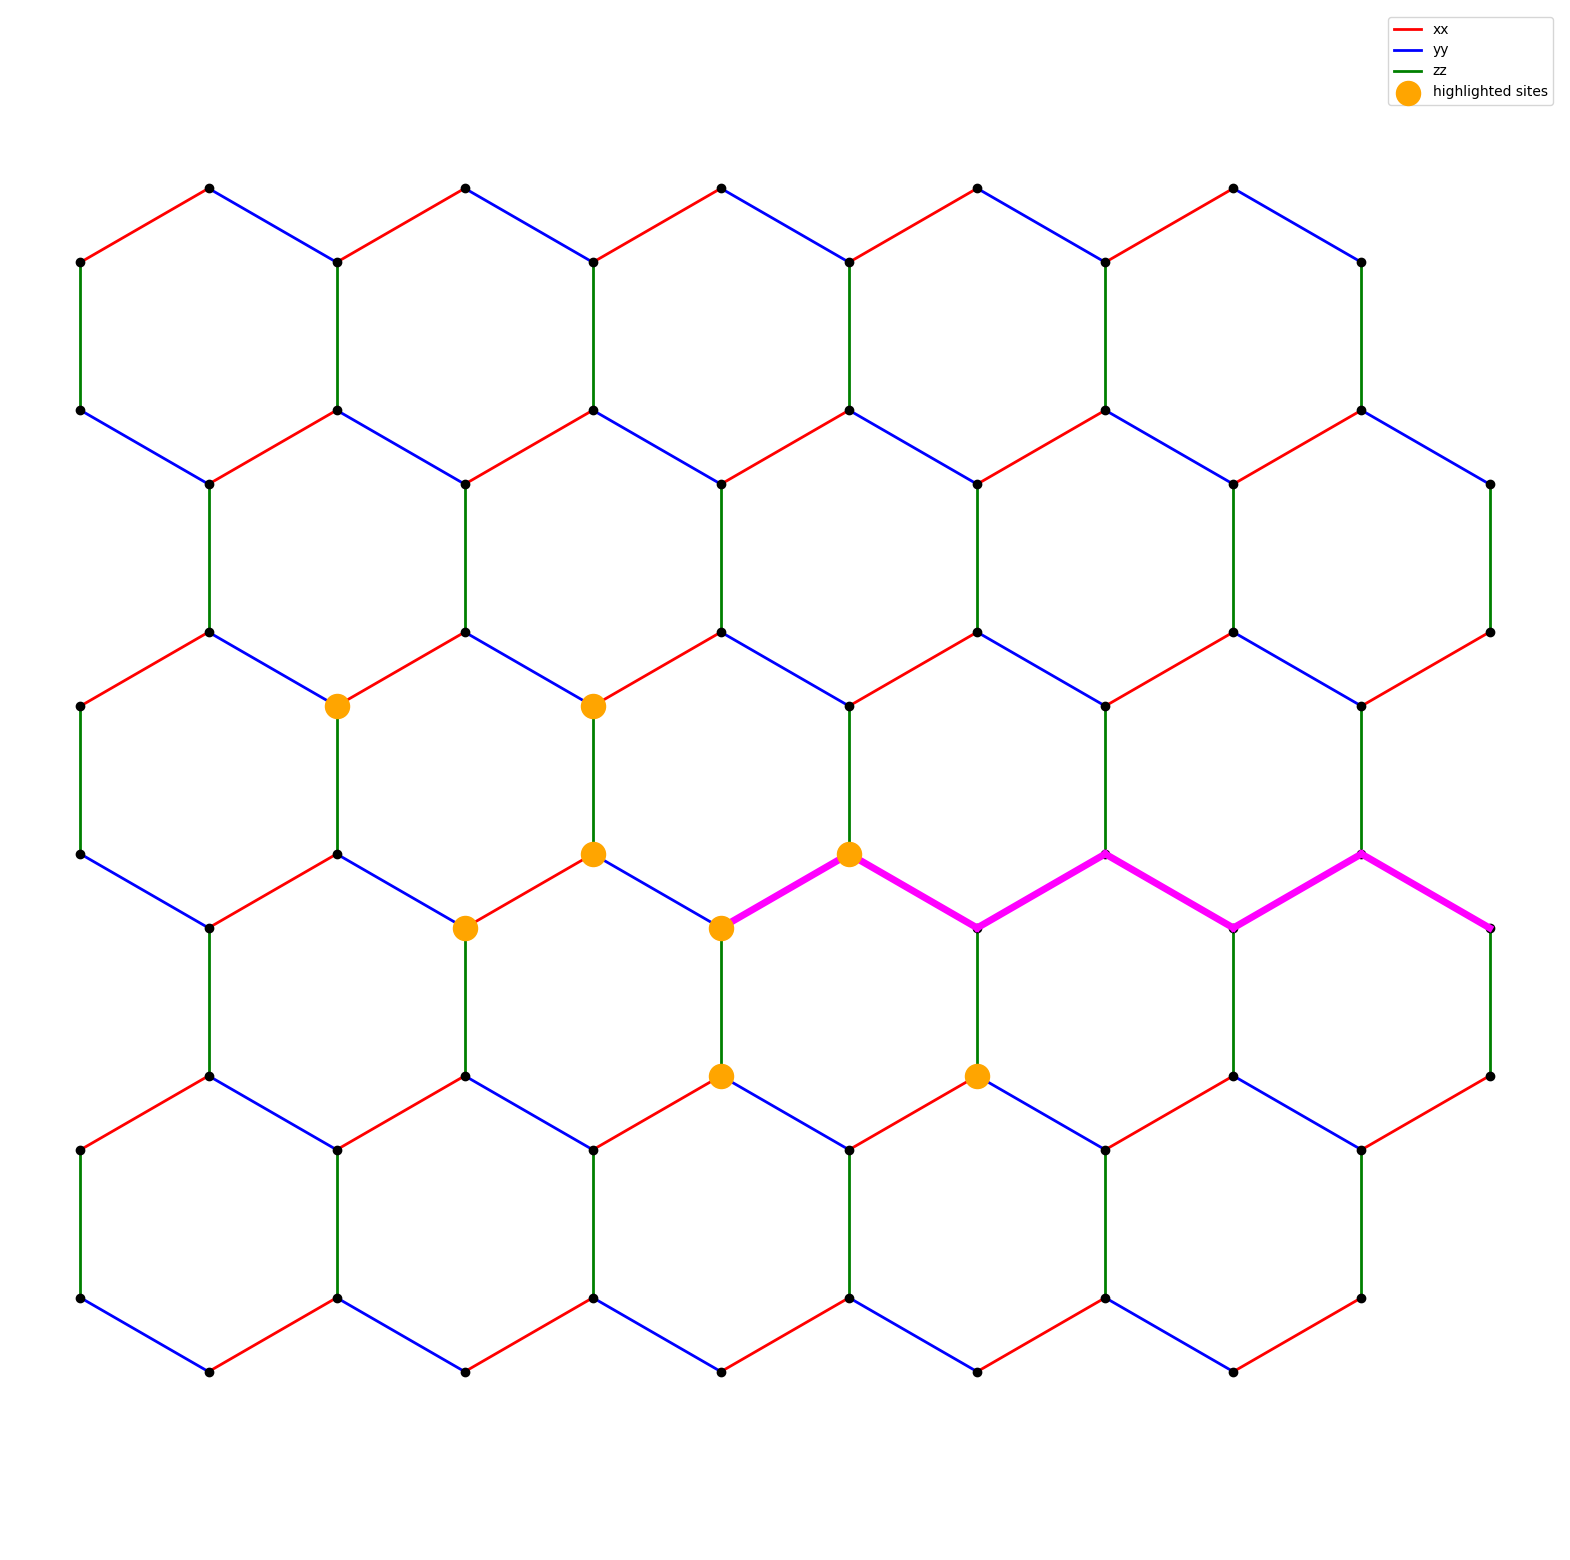

In [423]:
modell = site.SitesOBC(Npx = 5, Npy = 5)
# indices = [14,16,27,28,29,30,41,43]
indices = [25,27,38,39,40,41,52,54]
site.plot_honeycomb(modell, plot_anyon_bonds = True, plot_diagonal_bonds=False, indices = indices)

In [393]:
coords = model.get_coordinates()
print("Coordinates of sites: ", coords)

id 0 idx 0 idy 0
x 0.0 y -0.0
id 1 idx 1 idy 0
x 0.8660254037844386 y 0.5
id 2 idx 2 idy 0
x 1.7320508075688772 y -0.0
id 3 idx 3 idy 0
x 2.598076211353316 y 0.5
id 4 idx 4 idy 0
x 3.4641016151377544 y -0.0
id 5 idx 5 idy 0
x 4.330127018922193 y 0.5
id 6 idx 6 idy 0
x 5.196152422706632 y -0.0
id 7 idx 0 idy 1
x 0.0 y -1.0
id 8 idx 1 idy 1
x 0.8660254037844386 y -1.5
id 9 idx 2 idy 1
x 1.7320508075688772 y -1.0
id 10 idx 3 idy 1
x 2.598076211353316 y -1.5
id 11 idx 4 idy 1
x 3.4641016151377544 y -1.0
id 12 idx 5 idy 1
x 4.330127018922193 y -1.5
id 13 idx 6 idy 1
x 5.196152422706632 y -1.0
id 14 idx 7 idy 1
x 6.06217782649107 y -1.5
id 15 idx 0 idy 2
x 0.0 y -3.0
id 16 idx 1 idy 2
x 0.8660254037844386 y -2.5
id 17 idx 2 idy 2
x 1.7320508075688772 y -3.0
id 18 idx 3 idy 2
x 2.598076211353316 y -2.5
id 19 idx 4 idy 2
x 3.4641016151377544 y -3.0
id 20 idx 5 idy 2
x 4.330127018922193 y -2.5
id 21 idx 6 idy 2
x 5.196152422706632 y -3.0
id 22 idx 7 idy 2
x 6.06217782649107 y -2.5
id 23 idx 0 i

### Fermionic representation of many wonderful things

In [400]:
import free_fermion_representation as f
importlib.reload(f)
import pandas as pd

In [401]:
model = site.SitesOBC(Npx=5, Npy=5)
fgs = f.FermionicGaussianRepresentation(model)
print(model.Nsites)

70


In [402]:
H0_xmaj = f.generate_Hamiltonian_Majorana(model, Jxx=1.0, Jyy=0.0, Jzz=0.0)
H0_ymaj = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=1.0, Jzz=0.0)
H0_zmaj = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=0.0, Jzz=1.0)

H0_x = fgs.Hamiltonian_dirac(H0_xmaj)
H0_y = fgs.Hamiltonian_dirac(H0_ymaj)
H0_z = fgs.Hamiltonian_dirac(H0_zmaj)

dfx = pd.DataFrame(H0_x)
dfy = pd.DataFrame(H0_y)
dfz = pd.DataFrame(H0_z)

print("Hamiltonian H0_x:\n", dfx.round(2))
print("Hamiltonian H0_y:\n", dfy.round(2))
print("Hamiltonian H0_z:\n", dfz.round(2))

first row
id 0 idx 0 idy 0
first row
id 1 idx 1 idy 0
first row
id 2 idx 2 idy 0
first row
id 3 idx 3 idy 0
first row
id 4 idx 4 idy 0
first row
id 5 idx 5 idy 0
first row
id 6 idx 6 idy 0
first row
id 7 idx 7 idy 0
first row
id 8 idx 8 idy 0
first row
id 9 idx 9 idy 0
first row
id 10 idx 10 idy 0
odd row
id 11 idx 0 idy 1
odd row
id 12 idx 1 idy 1
odd row
id 13 idx 2 idy 1
odd row
id 14 idx 3 idy 1
odd row
id 15 idx 4 idy 1
odd row
id 16 idx 5 idy 1
odd row
id 17 idx 6 idy 1
odd row
id 18 idx 7 idy 1
odd row
id 19 idx 8 idy 1
odd row
id 20 idx 9 idy 1
odd row
id 21 idx 10 idy 1
odd row
id 22 idx 11 idy 1
even row
id 23 idx 0 idy 2
even row
id 24 idx 1 idy 2
even row
id 25 idx 2 idy 2
even row
id 26 idx 3 idy 2
even row
id 27 idx 4 idy 2
even row
id 28 idx 5 idy 2
even row
id 29 idx 6 idy 2
even row
id 30 idx 7 idy 2
even row
id 31 idx 8 idy 2
even row
id 32 idx 9 idy 2
even row
id 33 idx 10 idy 2
even row
id 34 idx 11 idy 2
odd row
id 35 idx 0 idy 3
odd row
id 36 idx 1 idy 3
odd row
i

In [403]:
He_xmaj = f.generate_Hamiltonian_Majorana(model, Jxx=1.0, Jyy=0.0, Jzz=0.0, type='Anyon')
He_ymaj = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=1.0, Jzz=0.0, type='Anyon')
He_zmaj = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=0.0, Jzz=1.0, type='Anyon')

He_x = fgs.Hamiltonian_dirac(He_xmaj)
He_y = fgs.Hamiltonian_dirac(He_ymaj)
He_z = fgs.Hamiltonian_dirac(He_zmaj)

# dfex = pd.DataFrame(He_x)
# dfey = pd.DataFrame(He_y)
# dfez = pd.DataFrame(He_z)

# print("Hamiltonian He_x:\n", dfex.round(2))
# print("Hamiltonian He_y:\n", dfey.round(2))
# print("Hamiltonian He_z:\n", dfez.round(2))

first row
id 0 idx 0 idy 0
first row
id 1 idx 1 idy 0
first row
id 2 idx 2 idy 0
first row
id 3 idx 3 idy 0
first row
id 4 idx 4 idy 0
first row
id 5 idx 5 idy 0
first row
id 6 idx 6 idy 0
first row
id 7 idx 7 idy 0
first row
id 8 idx 8 idy 0
first row
id 9 idx 9 idy 0
first row
id 10 idx 10 idy 0
odd row
id 11 idx 0 idy 1
odd row
id 12 idx 1 idy 1
odd row
id 13 idx 2 idy 1
odd row
id 14 idx 3 idy 1
odd row
id 15 idx 4 idy 1
odd row
id 16 idx 5 idy 1
odd row
id 17 idx 6 idy 1
odd row
id 18 idx 7 idy 1
odd row
id 19 idx 8 idy 1
odd row
id 20 idx 9 idy 1
odd row
id 21 idx 10 idy 1
odd row
id 22 idx 11 idy 1
even row
id 23 idx 0 idy 2
even row
id 24 idx 1 idy 2
even row
id 25 idx 2 idy 2
even row
id 26 idx 3 idy 2
even row
id 27 idx 4 idy 2
even row
id 28 idx 5 idy 2
even row
id 29 idx 6 idy 2
even row
id 30 idx 7 idy 2
even row
id 31 idx 8 idy 2
even row
id 32 idx 9 idy 2
even row
id 33 idx 10 idy 2
even row
id 34 idx 11 idy 2
odd row
id 35 idx 0 idy 3
odd row
id 36 idx 1 idy 3
odd row
i

# Topological Order Parameter

In [405]:
indices = [14,16,27,28,29,30,41,43]
indices = [25,27,38,39,40,41,52,54]

# loop = [1 if i in indices else 0 for i in range(model.Nsites)]
loop = np.zeros(model.Nsites)
loop[indices] = 1  # sets all specified indices to 1

print(loop)

print(fgs.expectation_val_Majorana_string(loop))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(-1+0j)


## Majorana notation
R = e^-(h/8)

In [406]:
t = (1/3.)*np.pi/4.
from scipy.linalg import expm

Rex = expm(He_xmaj*t/8)
Rey = expm(He_ymaj*t/8)
Rez = expm(He_zmaj*t/8)
fgs.update_cov_matrix(Rex)
fgs.update_cov_matrix(Rey)
fgs.update_cov_matrix(Rez)

print(fgs.expectation_val_Majorana_string(loop))

(-1.001875497315712+0j)


In [408]:
R0x = expm(H0_xmaj*t/8)
R0y = expm(H0_ymaj*t/8)
R0z = expm(H0_zmaj*t/8)
fgs.update_cov_matrix(R0x)
fgs.update_cov_matrix(R0y)
fgs.update_cov_matrix(R0z)

print(fgs.expectation_val_Majorana_string(loop))


(-1.0159084334378952+0j)


We define $\tilde{U}(T) = exp(2i \frac{T}{3}H_{0x})exp(2i \frac{T}{3}H_{0y})exp(2i \frac{T}{3}H_{0z})$

In [ ]:
from scipy.linalg import expm

T = 1.

Utilde = expm(2*1j*T*H0_x/3.)*expm(2*1j*T*H0_y/3.)*expm(2*1j*T*H0_z/3.)

In [ ]:
eigvals, eigvecs = np.linalg.eig(Utilde)

In [ ]:
print(eigvals)

[2.67315964+0.j 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j
 2.67315964+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j
 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j
 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 2.67315964+0.j
 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j]
